<center><h1>EDA for Project Arrhythmia</h1></center>

## Data pre processing stages

### Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### Loding the required .csv (data) file

In [3]:
df=pd.read_csv("Data/arrhythmia.csv", header=None)

### Inspecting first 5 rows of the dataset

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


### Inspecting last 5 rows of the dataset

In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


### Inspecting the dimension of the dataset

In [6]:
df.shape

(452, 280)

### Obtaining concise summary of the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


### Obtaining descriptive statistics of the dataset

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,452.0,46.471239,16.466631,0.0,36.00,47.00,58.000,83.0
1,452.0,0.550885,0.497955,0.0,0.00,1.00,1.000,1.0
2,452.0,166.188053,37.170340,105.0,160.00,164.00,170.000,780.0
3,452.0,68.170354,16.590803,6.0,59.00,68.00,79.000,176.0
4,452.0,88.920354,15.364394,55.0,80.00,86.00,94.000,188.0
...,...,...,...,...,...,...,...,...
275,452.0,0.514823,0.347531,-0.8,0.40,0.50,0.700,2.4
276,452.0,1.222345,1.426052,-6.0,0.50,1.35,2.100,6.0
277,452.0,19.326106,13.503922,-44.2,11.45,18.10,25.825,88.8
278,452.0,29.473230,18.493927,-38.6,17.55,27.90,41.125,115.9


### counting total number of null values

In [9]:
df.isnull().sum().sum()

np.int64(0)

### Replacing the "?" with np.nan value

In [10]:
df = df.replace('?',np.nan)

### Final counting total number of null values in dataset

In [11]:
nu = pd.isnull(df).sum().sum()
nu

np.int64(408)

### Visualizing the distribution of our missing data

Text(0, 0.5, 'Total number of null values in each column')

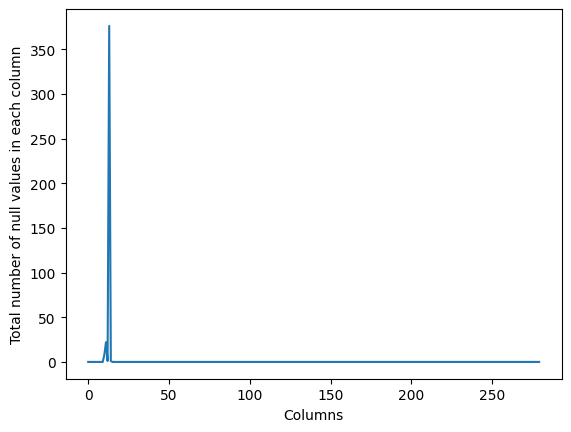

In [12]:
pd.isnull(df).sum().plot()
plt.xlabel("Columns")
plt.ylabel("Total number of null values in each column")

### Zooming into the visualization

Text(0, 0.5, 'Total number of null values in each column')

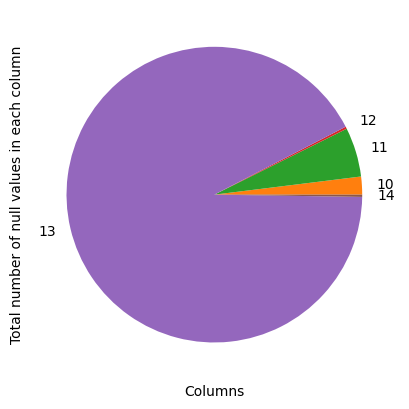

In [13]:
pd.isnull(df).sum()[9:16].plot(kind="pie")
plt.xlabel("Columns")
plt.ylabel("Total number of null values in each column")

### Visualizing the exact column of missing values

Text(0, 0.5, 'Total number of nuill values in each column')

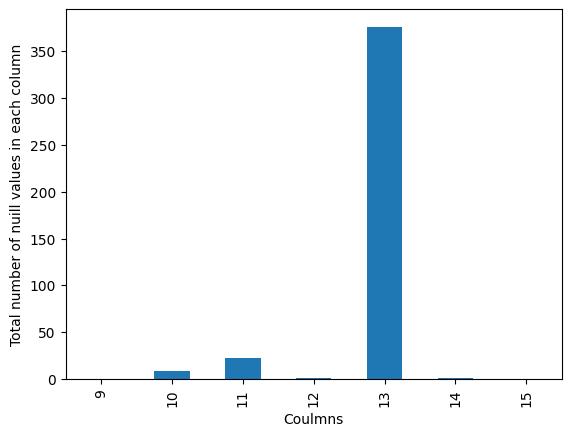

In [14]:
pd.isnull(df).sum()[9:16].plot(kind="bar")
plt.xlabel("Coulmns")
plt.ylabel("Total number of nuill values in each column")

### Dropping Column 13 as it has high number of missing elements

In [15]:
df.drop(columns =13, inplace=True)

### Making a copy to avoid affecting the main dataset

In [16]:
new_df = df.copy()

### Imputation

In [17]:
# Imputation
my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

### Inspecting the Imputed DataFrame

In [18]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [19]:
# Dataset with zero null values.
pd.isnull(new_df).sum().sum()

np.int64(0)

In [24]:
#Generating the final dataset

final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [25]:
#Adding Column names to dataset
new_df.columns=final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [26]:
# Removing target Attribute to Create a final dataframe.
final_df = new_df.drop(columns ="class")
final_df.to_csv("FInal Dataset with dropped class Attribute.csv")
final_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [27]:
pd.isnull(final_df).sum().sum()

np.int64(0)

## EDA (Exploratory data analysis) stage

In [28]:
#Making a list with all 16 class Names
#List with class names

class_names=["Normal", 
               "Ischemic changes (CAD)", 
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", 
               "Sinus bradycardy", 
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"] 

In [29]:
#Analyze the dataset and check how many examples we have for each class
#Just checking for the datatypes of attributes

final_df[["Age","Heart_Rate"]].dtypes

Age           float64
Heart_Rate    float64
dtype: object

In [32]:
#Sorting with respect to class attribute
t=new_df.sort_values(by=["class"])

In [33]:
#Counting the number of instances for each class
la = t["class"].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


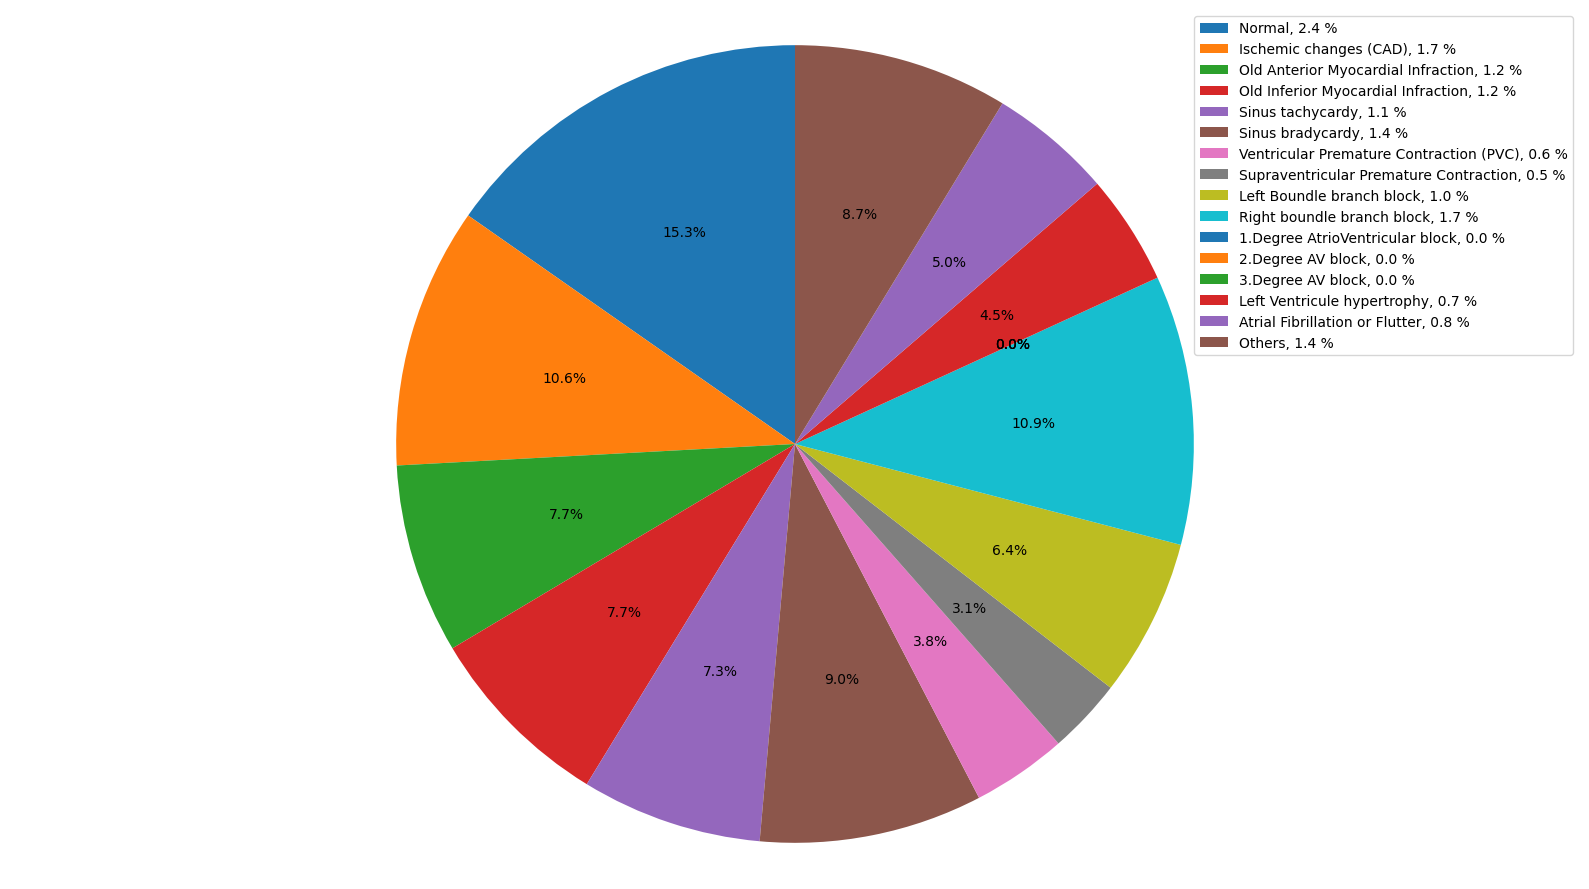

In [35]:
#Visualization of dataset with respect to class

labels = class_names
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)
#we normalize the data with base 10 logarithm to be able to "plot them in a decent way"
Log_Norm = []
for i in values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()

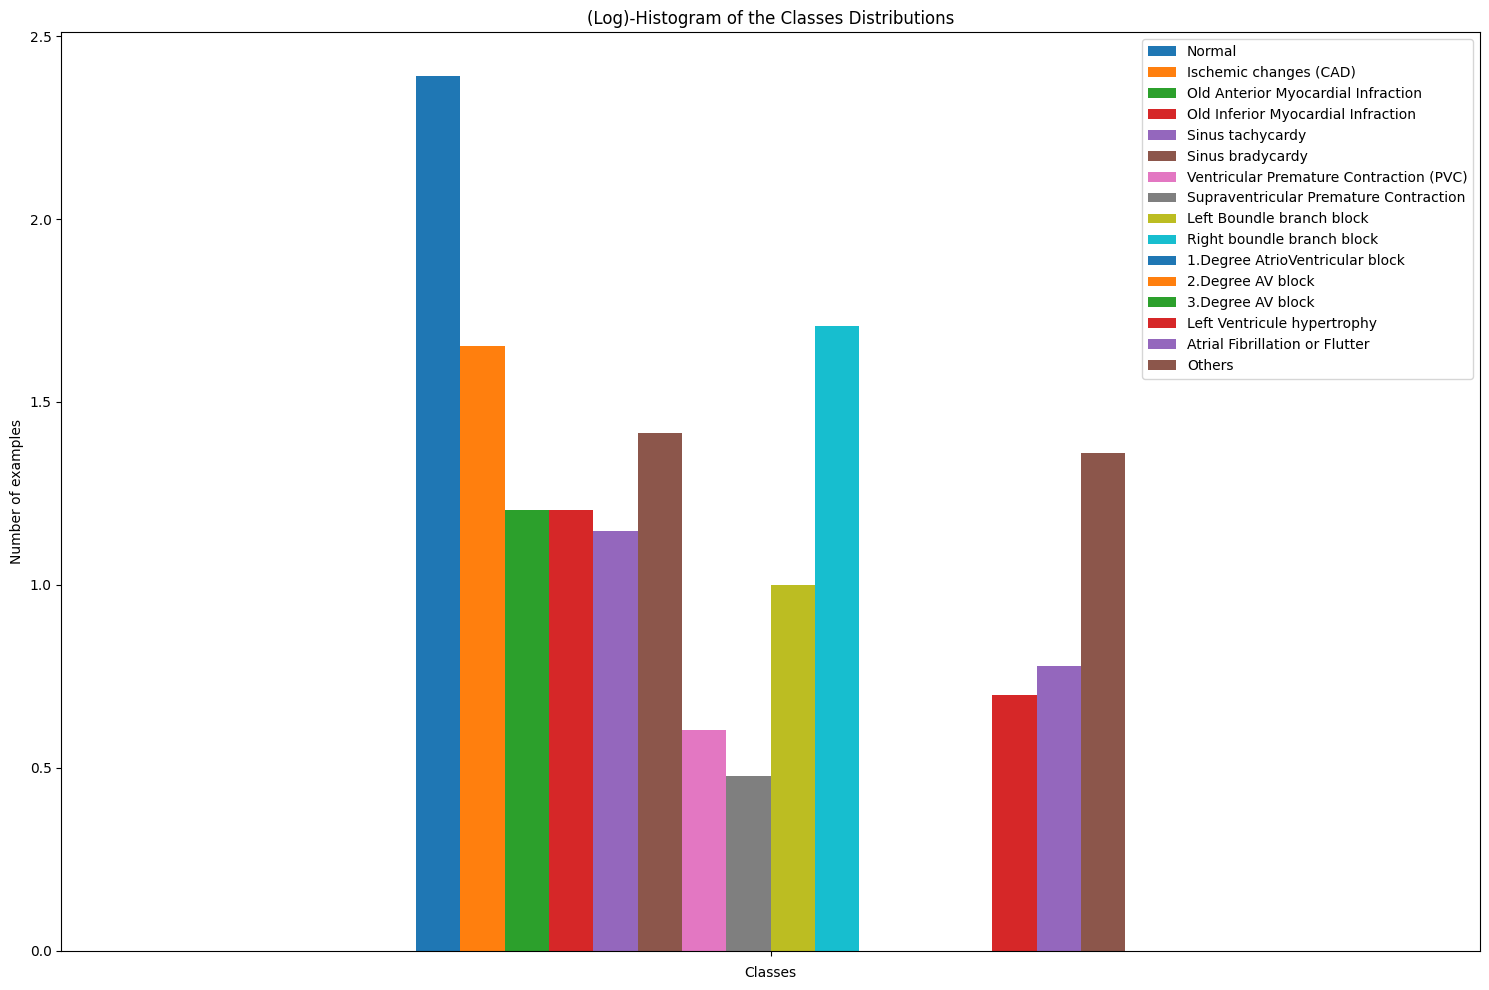

In [38]:
fdict = {}
j = 0
for i in labels:
    fdict[i]=Log_Norm[j]
    j+=1
fdf = pd.DataFrame(fdict,index=[0])
fdf = fdf.rename(index={0: ''})
fig, ax = plt.subplots(figsize=(15,10))
fdf.plot(kind="bar", ax=ax)
ax.set_title("(Log)-Histogram of the Classes Distributions")
ax.set_ylabel("Number of examples")
ax.set_xlabel("Classes")
fig.tight_layout()
plt.show()

In [39]:
#Grouped Description

grouped_mean = new_df.groupby(["class"]).mean()
grouped_median = new_df.groupby(["class"]).median()
grouped_mode = new_df.groupby(["class"]).agg(lambda x: sp.stats.mode(x)[0])
grouped_std = new_df.groupby(["class"]).std()

In [40]:
grouped_median.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
class,,,,,,,,,,,,,,,,,,,,,
1.0,46.0,1.0,163.0,68.0,84.0,156.0,367.0,160.0,91.0,41.0,...,-0.1,0.0,9.1,-0.9,0.0,0.0,0.5,1.6,19.10,31.7
2.0,55.0,1.0,160.5,70.0,90.5,159.0,366.0,176.5,91.0,37.5,...,-0.8,0.0,9.6,-1.3,0.0,0.0,0.5,-0.8,20.05,11.8
3.0,50.0,0.0,170.0,74.0,93.0,163.0,351.0,196.0,96.0,48.0,...,-0.2,0.0,6.3,-2.0,0.0,0.0,0.8,0.6,12.30,19.3
4.0,57.0,0.0,165.0,76.0,93.0,157.0,357.0,161.0,95.0,-2.0,...,-0.2,-0.7,6.3,-0.5,0.0,0.0,0.7,0.3,10.90,12.0
5.0,34.0,1.0,160.0,51.0,82.0,155.0,302.0,153.0,81.0,52.0,...,-0.3,0.0,5.1,-2.1,0.0,0.0,0.5,0.9,6.00,10.7


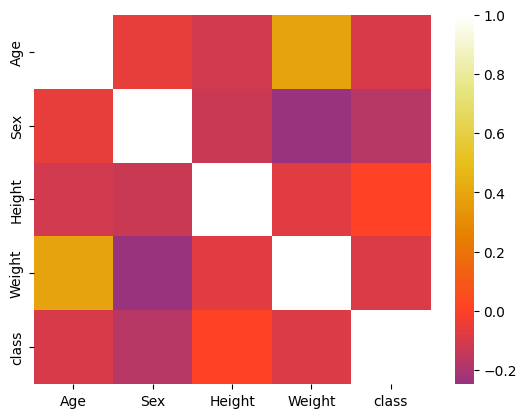

In [41]:
#Co-relational heatmap
sns.heatmap(new_df[['Age','Sex','Height','Weight','class']].corr(), cmap='CMRmap', center=0)
plt.show()

In [60]:
palette1=['red','blue']

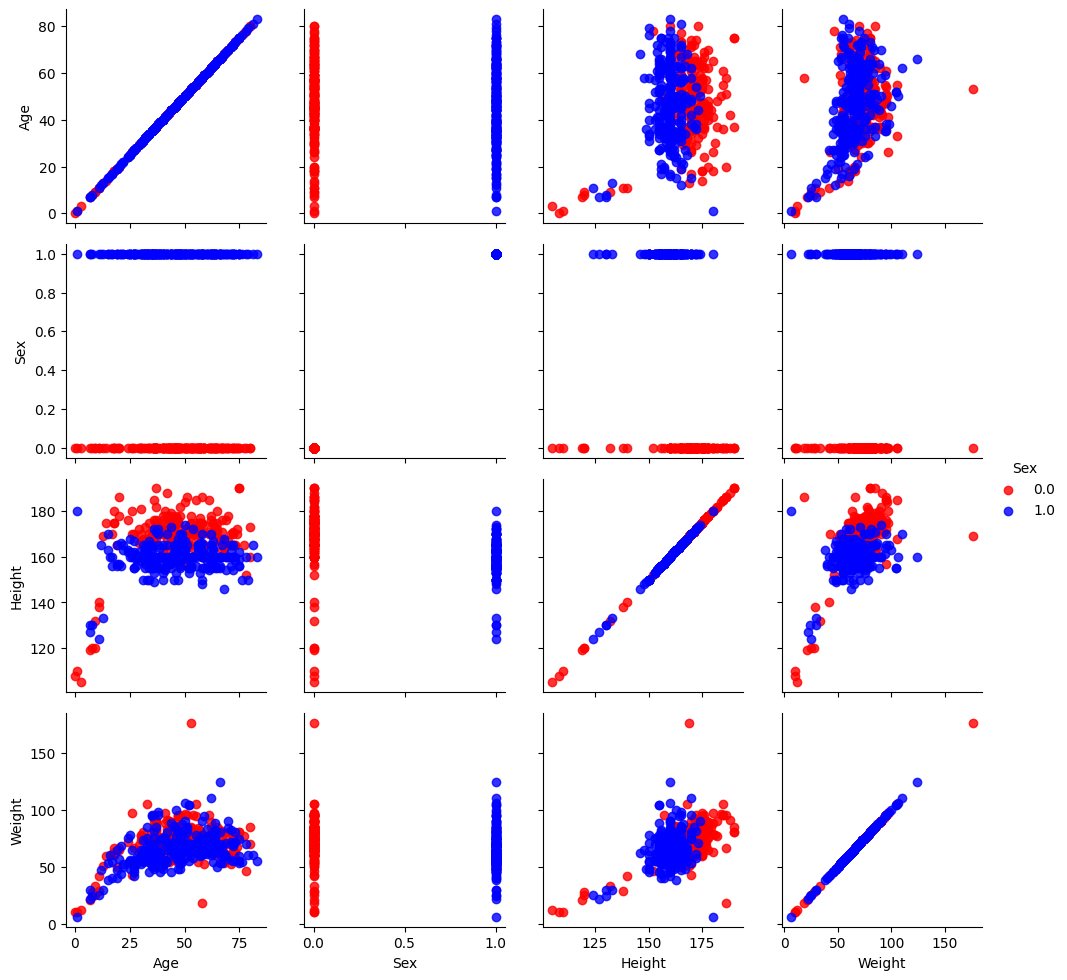

In [61]:
g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette=palette1)
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [62]:
sorted(final_df['Height'], reverse=True)[:10]

[190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0, 185.0, 185.0]

In [63]:
final_df["Height"]=final_df["Height"].replace(608,108)
final_df["Height"]=final_df["Height"].replace(780,180)

In [64]:
sorted(final_df["Weight"], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

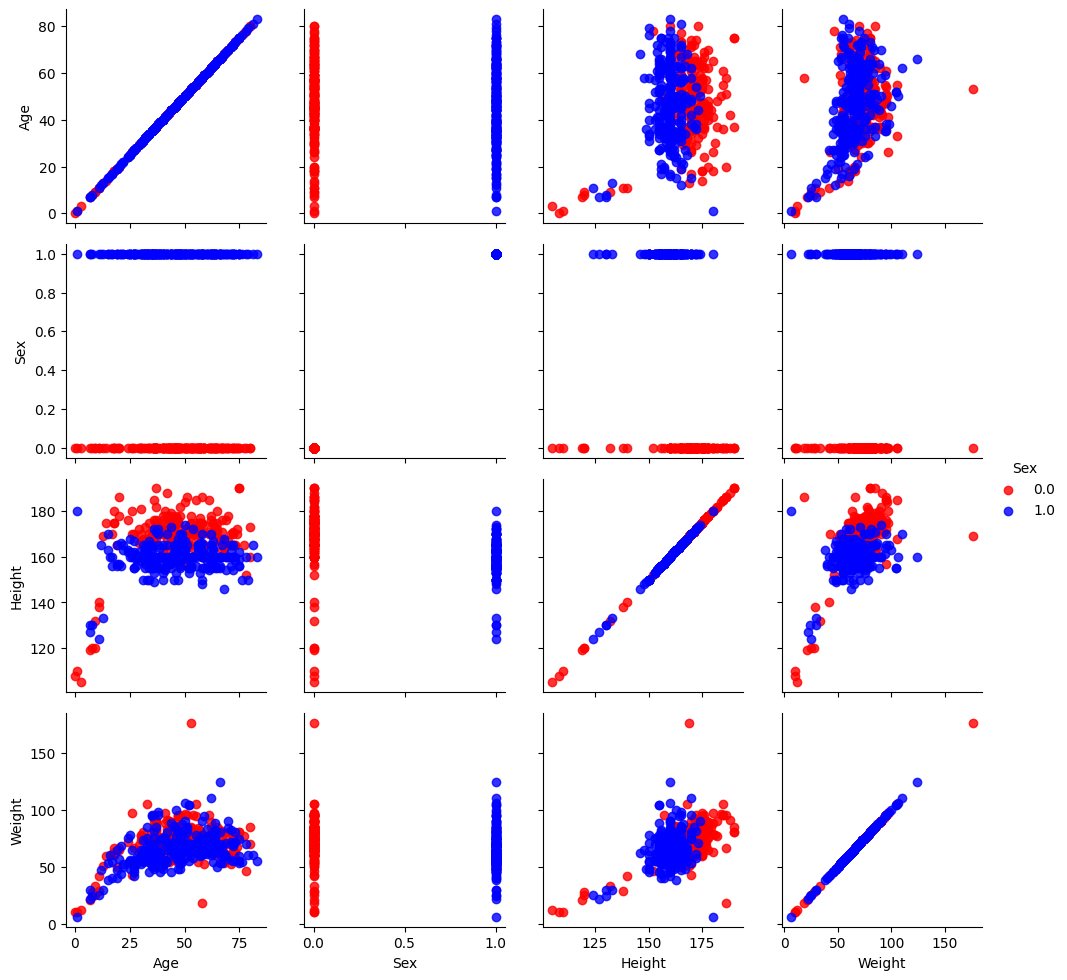

In [65]:
g = sns.PairGrid(final_df, vars=['Age','Sex','Height','Weight'],
                 hue='Sex',palette=palette1)
g.map(plt.scatter, alpha=0.8)
g.add_legend();

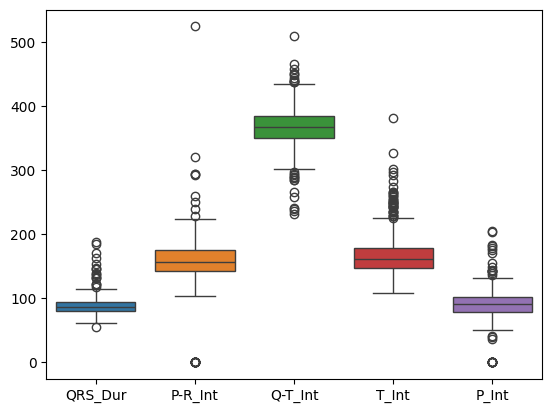

In [59]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);